### Assignment 2

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import pillow_heif
pillow_heif.register_heif_opener()

E:\Others\Machine Learning\Python-venv\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
dataset_path = 'E:/Others/Machine Learning/Python-venv/studentdata'

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Folder not found at: {os.path.abspath(dataset_path)}. Please check your directory.")

folders = os.listdir(dataset_path)
NUM_CLASSES = len(folders)

print(f"Total Students (Classes): {NUM_CLASSES}")
print(f"First 10 Student ID: {folders[:10]}")

Total Students (Classes): 79
First 10 Student IDs: ['21-45902-3', '22-46138-1', '22-46139-1', '22-46141-1', '22-46156-1', '22-46258-1', '22-46275-1', '22-46293-1', '22-46342-1', '22-46473-1']


In [3]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [4]:
print("\nLoading Training Data...")
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

print("\nLoading Validation Data...")
validation_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
# Training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
print(f"\nTotal training samples: {train_generator.samples}")
print(f"Total validation samples: {validation_generator.samples}")


Loading Training Data...
Found 1216 images belonging to 79 classes.

Loading Validation Data...
Found 281 images belonging to 79 classes.
Found 1216 images belonging to 79 classes.
Found 281 images belonging to 79 classes.

Total training samples: 1216
Total validation samples: 281


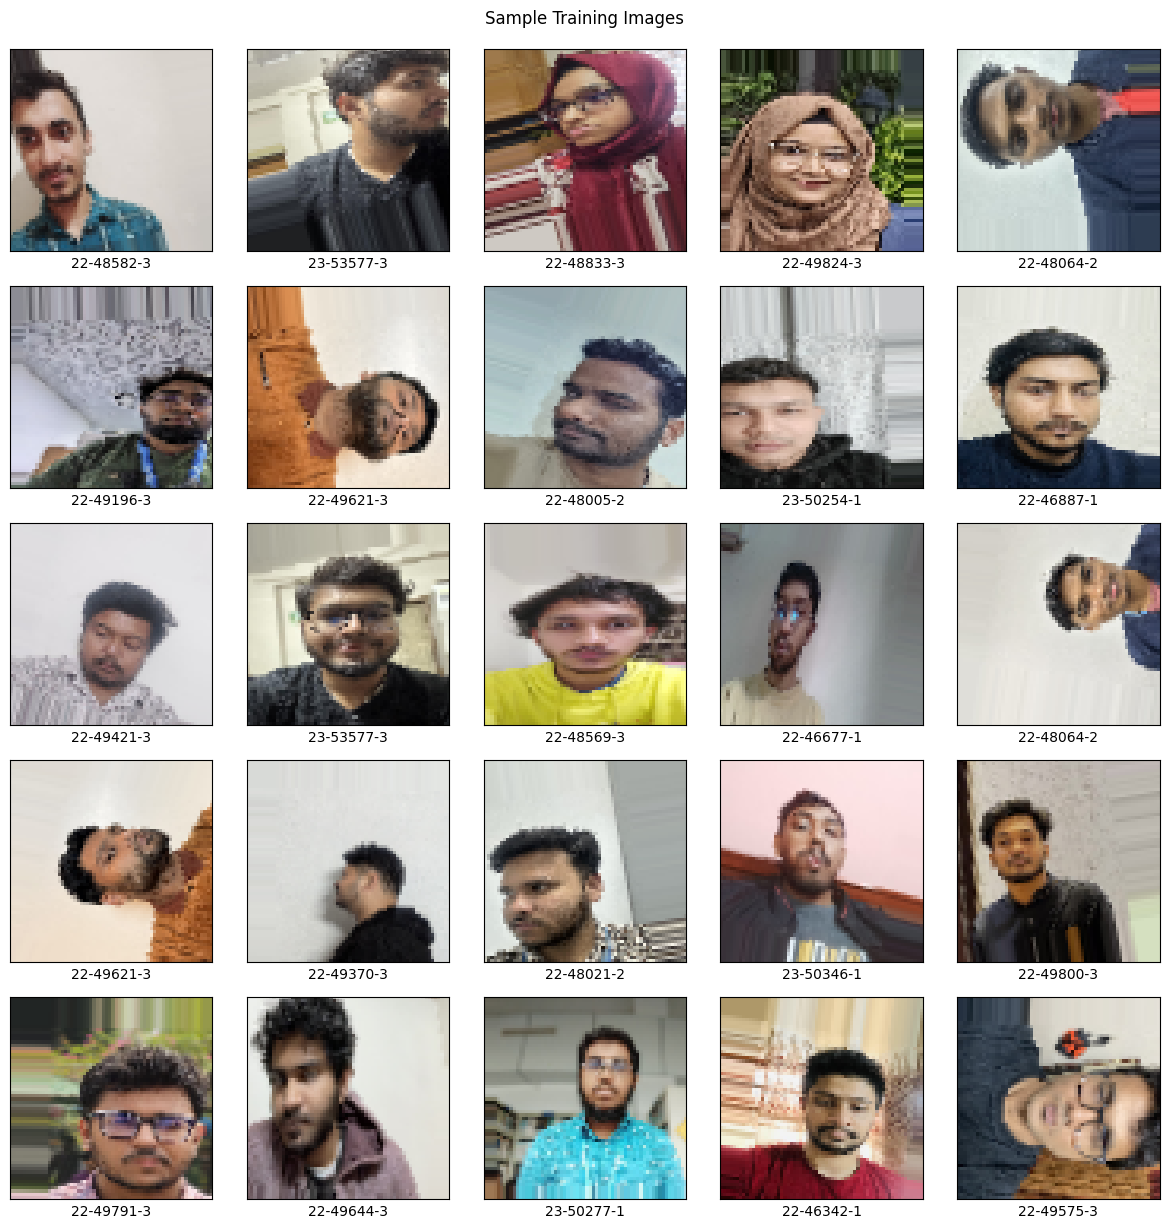

In [5]:
plt.figure(figsize=(12, 12))
images, labels = next(train_generator)

for i in range(min(25, len(images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.xlabel(class_names[int(labels[i])])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.suptitle('Sample Training Images', y=1.02)
plt.show()

In [6]:
model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 4
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Dense
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])
model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 4
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)             │ (None, 64, 64, 32)    │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_8         │ (None, 64, 64, 32)    │          128 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_8 (Conv2D)             │ (None, 64, 64, 32)    │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_9         │ (None, 64, 64, 32)    │          128 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 32, 32, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 32, 32, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_9 (Conv2D)             │ (None, 32, 32, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_10        │ (None, 32, 32, 64)    │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_10 (Conv2D)            │ (None, 32, 32, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_11        │ (None, 32, 32, 64)    │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 16, 16, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_7 (Dropout)           │ (None, 16, 16, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_11 (Conv2D)            │ (None, 16, 16, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_12        │ (None, 16, 16, 128)   │          512 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_12 (Conv2D)            │ (None, 16, 16, 128)   │      147,584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_13        │ (None, 16, 16, 128)   │          512 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 8, 8, 128)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_8 (Dropout)           │ (None, 8, 8, 128)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_13 (Conv2D)            │ (None, 8, 8, 256)     │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_14        │ (None, 8, 8, 256)     │        1,024 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 4, 4, 256)     │            0 │
│ (MaxPooling2D)                │                       │ 

 Total params: 2,836,335 (10.82 MB)

 Trainable params: 2,833,903 (10.81 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
print(f"Scanning for BAD images in: {dataset_path} ...")

bad_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)
        
        if file.startswith('.') or file == "Thumbs.db":
            print(f"Found hidden file (deleting or ignoring): {file_path}")
            continue
            
        try:
            with Image.open(file_path) as img:
                img.verify() 
        except (IOError, SyntaxError, Image.UnidentifiedImageError) as e:
            print(f"CORRUPT FILE FOUND: {file_path}")
            bad_files.append(file_path)

if len(bad_files) == 0:
    print("\n All images look healthy!")
else:
    print(f"\nFound {len(bad_files)} bad files.")
    print("Go to these folders and DELETE specific files manually.")

Scanning for BAD images in: E:/Others/Machine Learning/Python-venv/studentdata ...

 All images look healthy!


In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1
)
print("\nStarting Training...")
history = model.fit(
    train_generator,
    epochs=50, 
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Starting Training...
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.0461 - loss: 5.2113 - val_accuracy: 0.0142 - val_loss: 4.8057 - learning_rate: 0.0010
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.0839 - loss: 4.4705 - val_accuracy: 0.0142 - val_loss: 5.7596 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.1332 - loss: 3.7965 - val_accuracy: 0.0142 - val_loss: 8.3100 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.1933 - loss: 3.4640 - val_accuracy: 0.0142 - val_loss: 9.4159 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.2451 - loss: 3.1007 - val_accuracy: 0.0142 - val_loss: 12.4880 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2868 - loss: 2.8927
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.2796 - loss: 2

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6228 - loss: 1.7276



Final Accuracy: 62.28%
Model saved locally as 'student_recognition_model.h5'


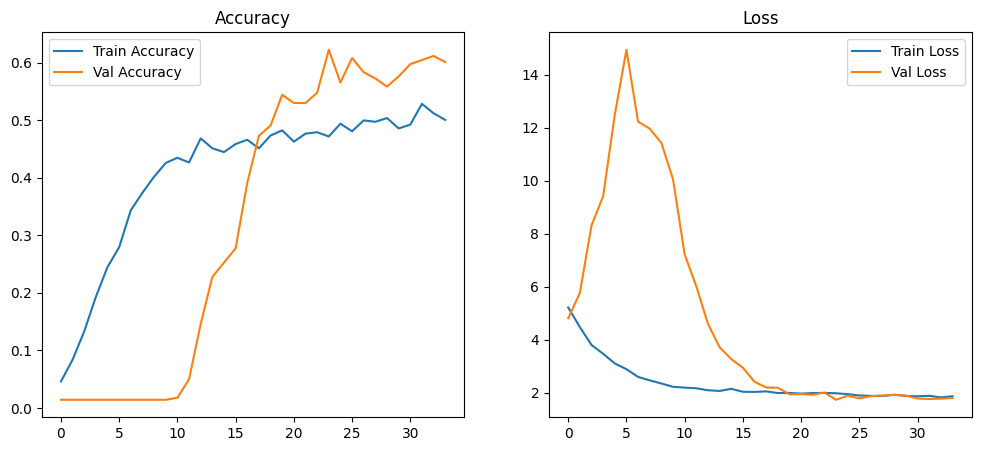

In [10]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"\nFinal Accuracy: {val_accuracy*100:.2f}%")

model.save('student_recognition_model.h5')
print("Model saved locally as 'student_recognition_model.h5'")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import os
from IPython.display import display, Javascript
from base64 import b64decode
import PIL.Image
import pandas as pd

In [13]:
IMG_SIZE = 64
CONFIDENCE_THRESHOLD = 0.6
MODEL_PATH = "student_recognition_model.h5"
DATASET_PATH = "E:/Others/Machine Learning/Python-venv/studentdata"
 

model = tf.keras.models.load_model(MODEL_PATH)
print("✅ Model loaded")
 

class_names = sorted(os.listdir(DATASET_PATH))
print("Classes:", class_names)
 
label_map = {i: name for i, name in enumerate(class_names)}
 

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
 
cap = cv2.VideoCapture(0)
print("🎥 Webcam started (Press Q to quit)")
 
while True:
    ret, frame = cap.read()
    if not ret:
        break
 
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(60, 60)
    )
 
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
 
        face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
        face = face.astype("float32") / 255.0
        face = np.expand_dims(face, axis=0)
 
        preds = model.predict(face, verbose=0)
        confidence = float(np.max(preds))
        label = int(np.argmax(preds))
 
        if confidence < CONFIDENCE_THRESHOLD:
            name = "Unknown"
            color = (0, 0, 255)
        else:
            name = label_map[label]
            color = (0, 255, 0)
 
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(
            frame,
            f"{name} ({confidence:.2f})",
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            color,
            2
        )
 
    cv2.imshow("Student Face Recognition", frame)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()
print("Closed")

✅ Model loaded
Classes: ['21-45902-3', '22-46138-1', '22-46139-1', '22-46141-1', '22-46156-1', '22-46258-1', '22-46275-1', '22-46293-1', '22-46342-1', '22-46473-1', '22-46536-1', '22-46586-1', '22-46590-1', '22-46666-1', '22-46677-1', '22-46679-1', '22-46840-1', '22-46877-1', '22-46887-1', '22-46931-1', '22-46983-1', '22-47027-1', '22-47180-1', '22-47384-2', '22-47402-2', '22-47802-2', '22-47813-2', '22-47884-2', '22-47892-2', '22-47894-2', '22-47898-2', '22-47925-2', '22-47934-2', '22-47966-2', '22-47968-2', '22-48005-2', '22-48021-2', '22-48023-2', '22-48039-2', '22-48055-2', '22-48064-2', '22-48091-2', '22-48133-2', '22-48205-2', '22-48434-3', '22-48541-3', '22-48569-3', '22-48582-3', '22-48833-3', '22-49068-3', '22-49167-3', '22-49196-3', '22-49338-3', '22-49355-3', '22-49370-3', '22-49421-3', '22-49440-3', '22-49453-3', '22-49507-3', '22-49575-3', '22-49609-3', '22-49621-3', '22-49644-3', '22-49745-3', '22-49791-3', '22-49800-3', '22-49824-3', '22-49843-3', '22-49852-3', '22-49862

# output 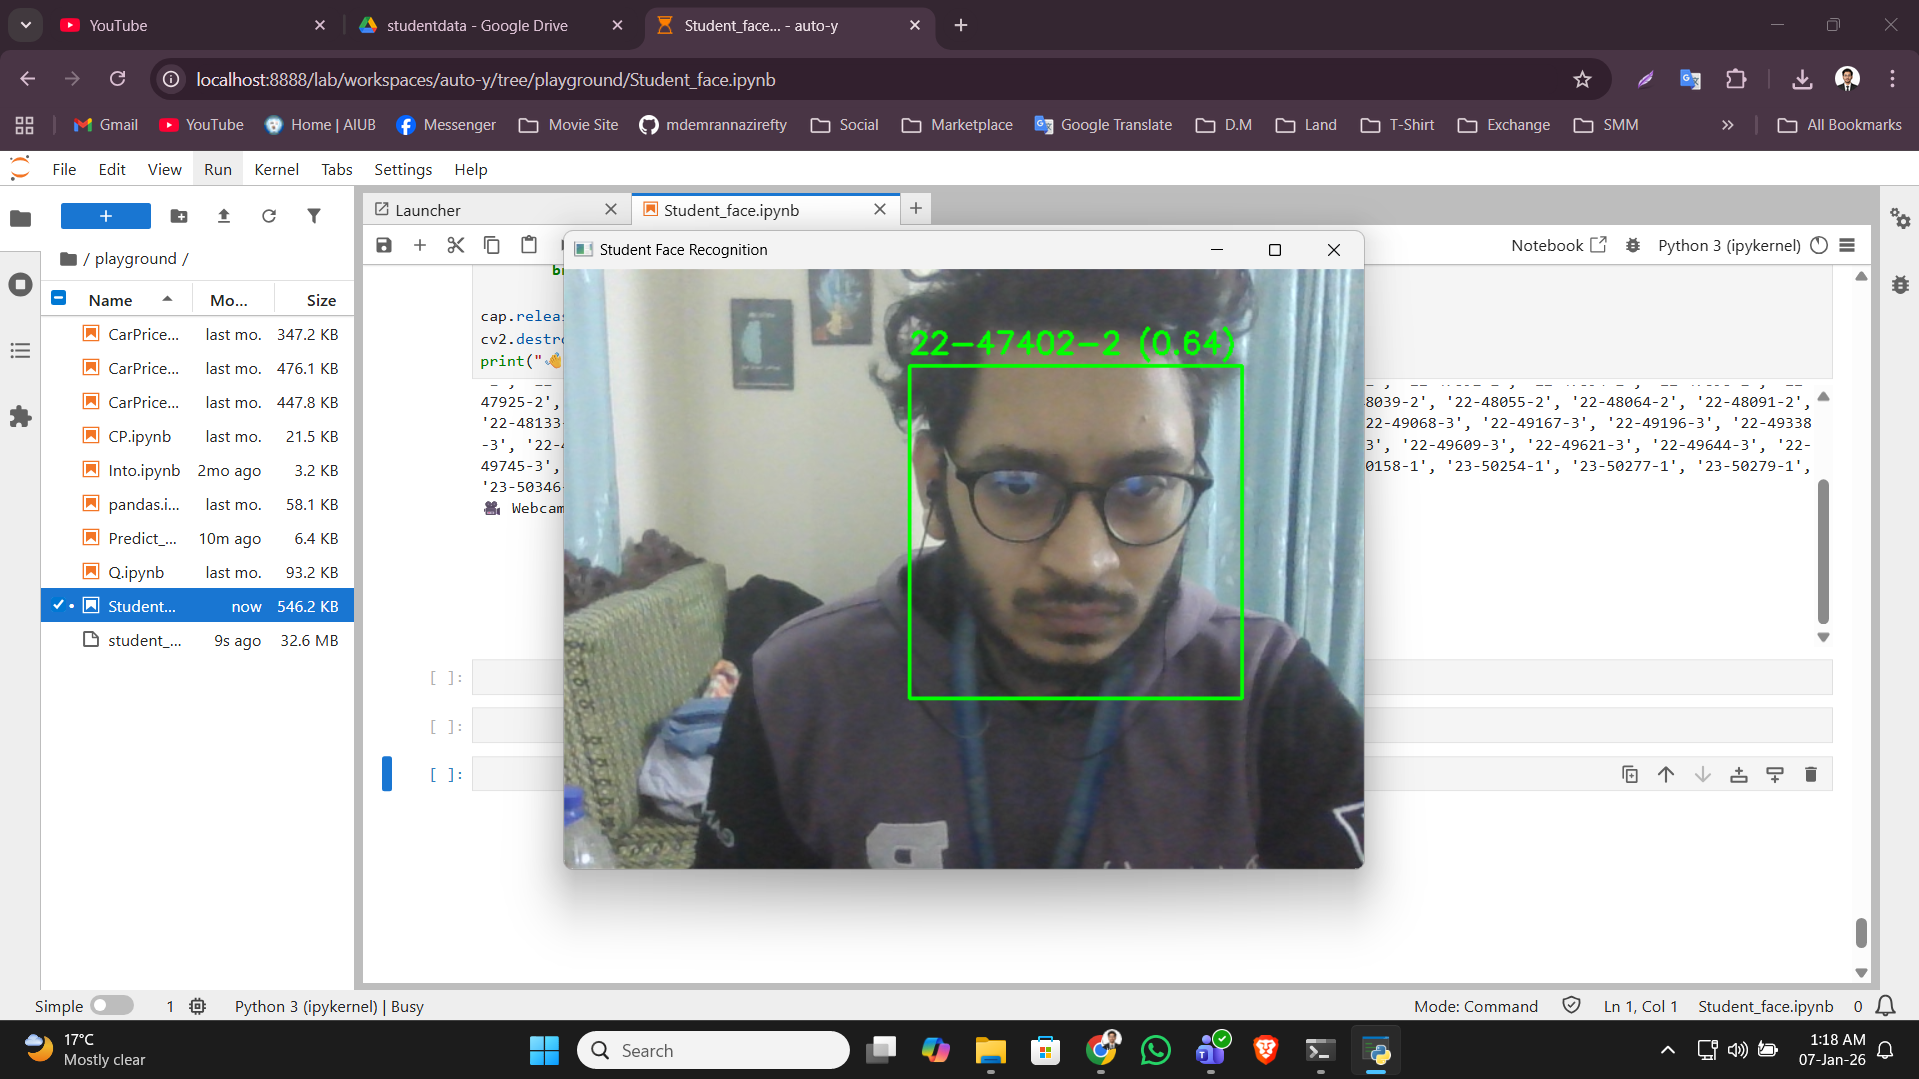